Note: All code in script is sourced from various internet sources, from mentor Tomasz Popiel and from Alan Chalk at Sabre Insurance.

## Hierarchical clustering 

Contents:

 - Start_: import modules, set directories, load data ('03_distancematrix_20%_exclude_target.hkl') 
 
 - Choosing the Linkage
 
 -  Deciding the number of clusters
     -  1. Silhouette Coefficients
     -  2. Dendrogram
 
-  Agglomerative clustering 
    -  With 11 clusters
    -  With 42 clusters

-  Target variables analysis

-  Varaible 'tq_v3' investigation

-  t-SNE Visualisation

Notes: 

### Start_:

Import modules

In [0]:
import os
import hickle as hkl
import gc

import pandas as pd
import numpy as np

from scipy.spatial.distance import squareform

from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet

from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics 

import collections, numpy 

import seaborn
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Set directories

In [0]:
print(os.getcwd())

dirRawData = "../RawData/"
dirPData = "../PData/"
dirPOutput = "../POutput/"

/Users/rachel/Documents/Queen Mary/MSc Business Analytics/BUSM130 (Group Project)/GP_Python/Submissions


Load data

In [0]:
fname = dirPData + '03_distancematrix_20%_exclude_target.hkl' 
with open(fname, 'r') as f:
    dict_ = hkl.load(f)


# %% Load data

D_3 = dict_['D_3']
df_all_2 = dict_['df_all_2'] # 20% of non scaled data 
df_all = dict_['df_all'] # 20% of scaled data

del fname

### Choosing the linkage 

Compute the cophenetic correlation coefficient for average, complete and single linkage.

In [0]:
average_linkage = linkage(D_3,'average')  

In [0]:
cophenet(average_linkage, D_3)

(0.6023702377618355,
 array([12.94814764, 11.78915426, 15.56464005, ..., 11.78915426,
        16.92047925, 16.92047925]))

In [0]:
complete_linkage = linkage(D_3,'complete')  

In [0]:
cophenet(complete_linkage, D_3)

(0.5750246715978836,
 array([24.94555173, 23.23353254, 24.94555173, ..., 28.46200797,
        28.46200797, 19.11307701]))

In [0]:
single_linkage = linkage(D_3,'single')  

In [0]:
cophenet(single_linkage, D_3)

(0.239341962199603,
 array([5.07530378, 7.39628231, 4.28079335, ..., 5.83953147, 5.83953147,
        3.24516753]))

### Deciding the number of clusters

Make data into square form

In [0]:
D_3_square = squareform(D_3)
del D_3
gc.collect()

7

In [0]:
print(D_3_square.shape)

(13039, 13039)


1. Silhouette coefficients

In [0]:
for i in [3,4,5,6,7,8,9,10,11,12,13,14,15]:

    cluster_trial=AgglomerativeClustering(n_clusters=i, affinity='precomputed', linkage='average')
    clustering_trial = cluster_trial.fit(D_3_square)
    
    
    mean = metrics.silhouette_score(D_3_square, clustering_trial.labels_, metric='precomputed')
    print(i, "cluster", mean)

3 cluster 0.14944345538884052
4 cluster 0.11224733856049605
5 cluster 0.09247628121887957
6 cluster 0.07643554425117116
7 cluster 0.12081994497587617
8 cluster 0.0896469595086885
9 cluster 0.09297232098909257
10 cluster 0.09073856429759722
11 cluster 0.1263900492031873
12 cluster 0.10989796936586672
13 cluster 0.11558892365525789
14 cluster 0.1120351646051181
15 cluster 0.12376078524233353


In [0]:
clusters = 2 + 5 * np.arange(40) 
means = []

for i in clusters:

    cluster_trial=AgglomerativeClustering(n_clusters=i, affinity='precomputed', linkage='average')
    clustering_trial = cluster_trial.fit(D_3_square)
    
    mean = metrics.silhouette_score(D_3_square, clustering_trial.labels_, metric='precomputed')
    means.extend([mean])
    print(i, "cluster", mean)

2 cluster 0.21031207601217802
7 cluster 0.12081994497587617
12 cluster 0.10989796936586672
17 cluster 0.11917724123889323
22 cluster 0.12779170276271148
27 cluster 0.14135889423311482
32 cluster 0.13731146986399595
37 cluster 0.1469333844346154
42 cluster 0.1502262532514837
47 cluster 0.14583049066261988
52 cluster 0.14740848526998848
57 cluster 0.1453727562221649
62 cluster 0.13812277393276545
67 cluster 0.13533521706687532
72 cluster 0.12852451108525967
77 cluster 0.11837319369483694
82 cluster 0.11690682340570667
87 cluster 0.11789132425098096
92 cluster 0.12387630019422634
97 cluster 0.1351227108722884
102 cluster 0.13565071693944447
107 cluster 0.13347330724798967
112 cluster 0.13143874981726858
117 cluster 0.12860379124247515
122 cluster 0.12806990818157601
127 cluster 0.12252780081174305
132 cluster 0.12441948463276124
137 cluster 0.12246554920082672
142 cluster 0.12148932529965639
147 cluster 0.11971768474976882
152 cluster 0.11812277590262708
157 cluster 0.11677800110239865
16

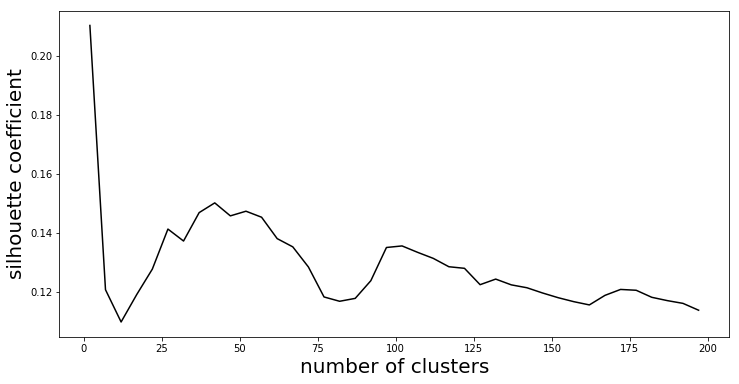

In [0]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(clusters, means, 'k-')
_ = ax1.set_xlabel('number of clusters', fontsize=20)
_ = ax1.set_ylabel('silhouette coefficient', fontsize=20)


In [0]:
for i in [38,39,40,41,42,43,44,45,46]:

    cluster_trial=AgglomerativeClustering(n_clusters=i, affinity='precomputed', linkage='average')
    clustering_trial = cluster_trial.fit(D_3_square)
    
    
    mean = metrics.silhouette_score(D_3_square, clustering_trial.labels_, metric='precomputed')
    print(i, "cluster", mean)

38 cluster 0.1455000584300456
39 cluster 0.14093941815559974
40 cluster 0.139942259365053
41 cluster 0.13913172454920514
42 cluster 0.1502262532514837
43 cluster 0.14641735405208137
44 cluster 0.14676455237578542
45 cluster 0.14672603440292717
46 cluster 0.14665719812194672


2. Dendrograms

In [0]:
def plt_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('Cluster Size')
        plt.ylabel('Distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

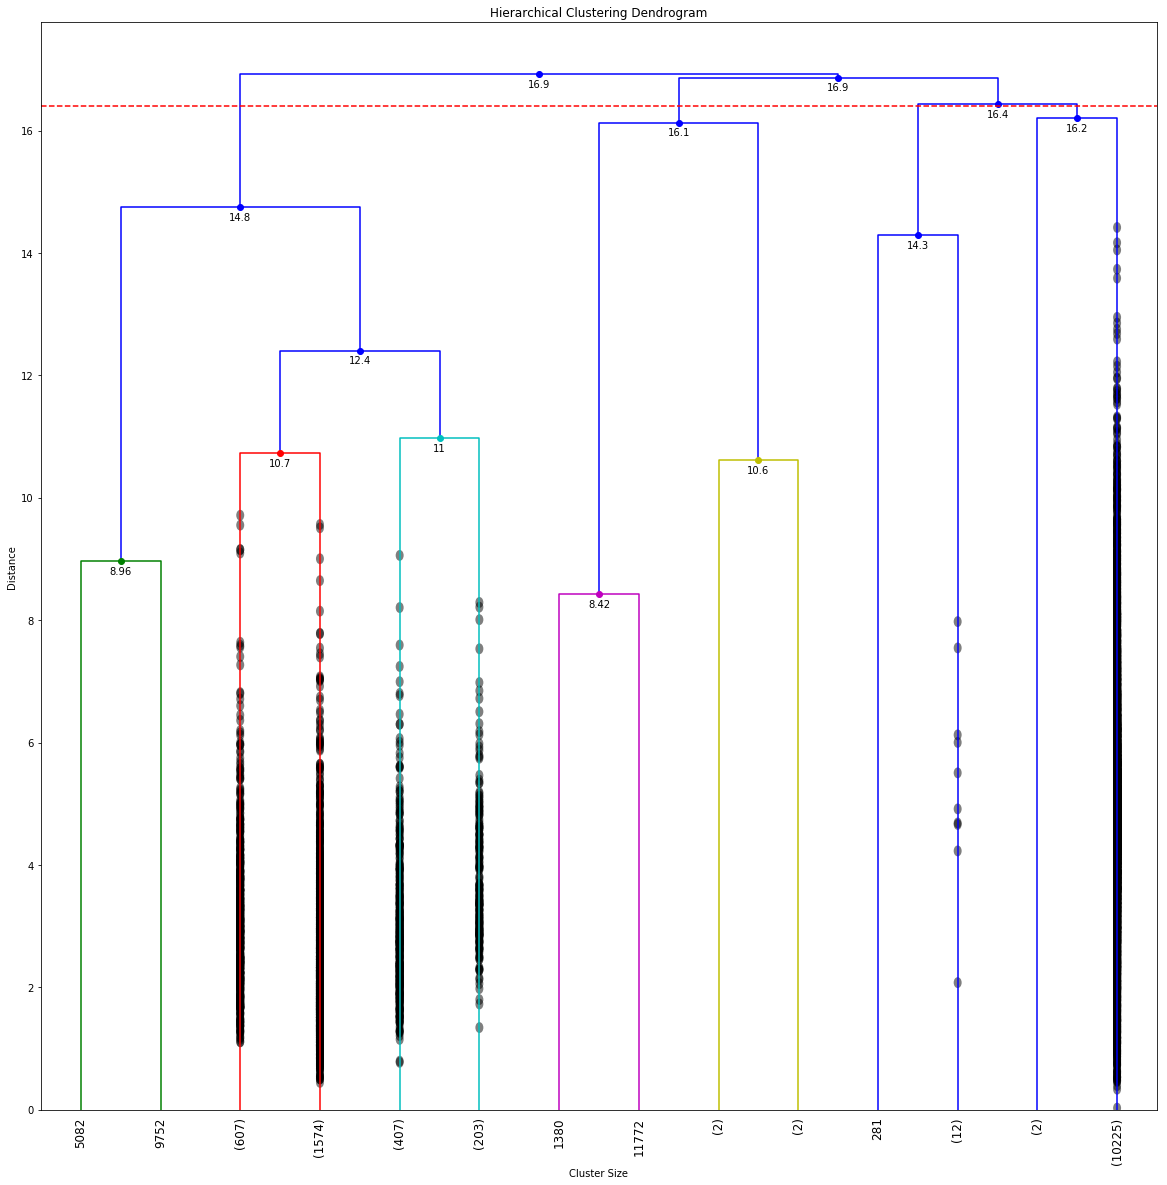

In [0]:
plt.figure(figsize=(20,20))
plt_dendrogram(
    average_linkage,
    truncate_mode='level',
    p=3, # increase to print more levels
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=2,  
)

plt.axhline(y=16.4, color='r', linestyle='--')
plt.show()

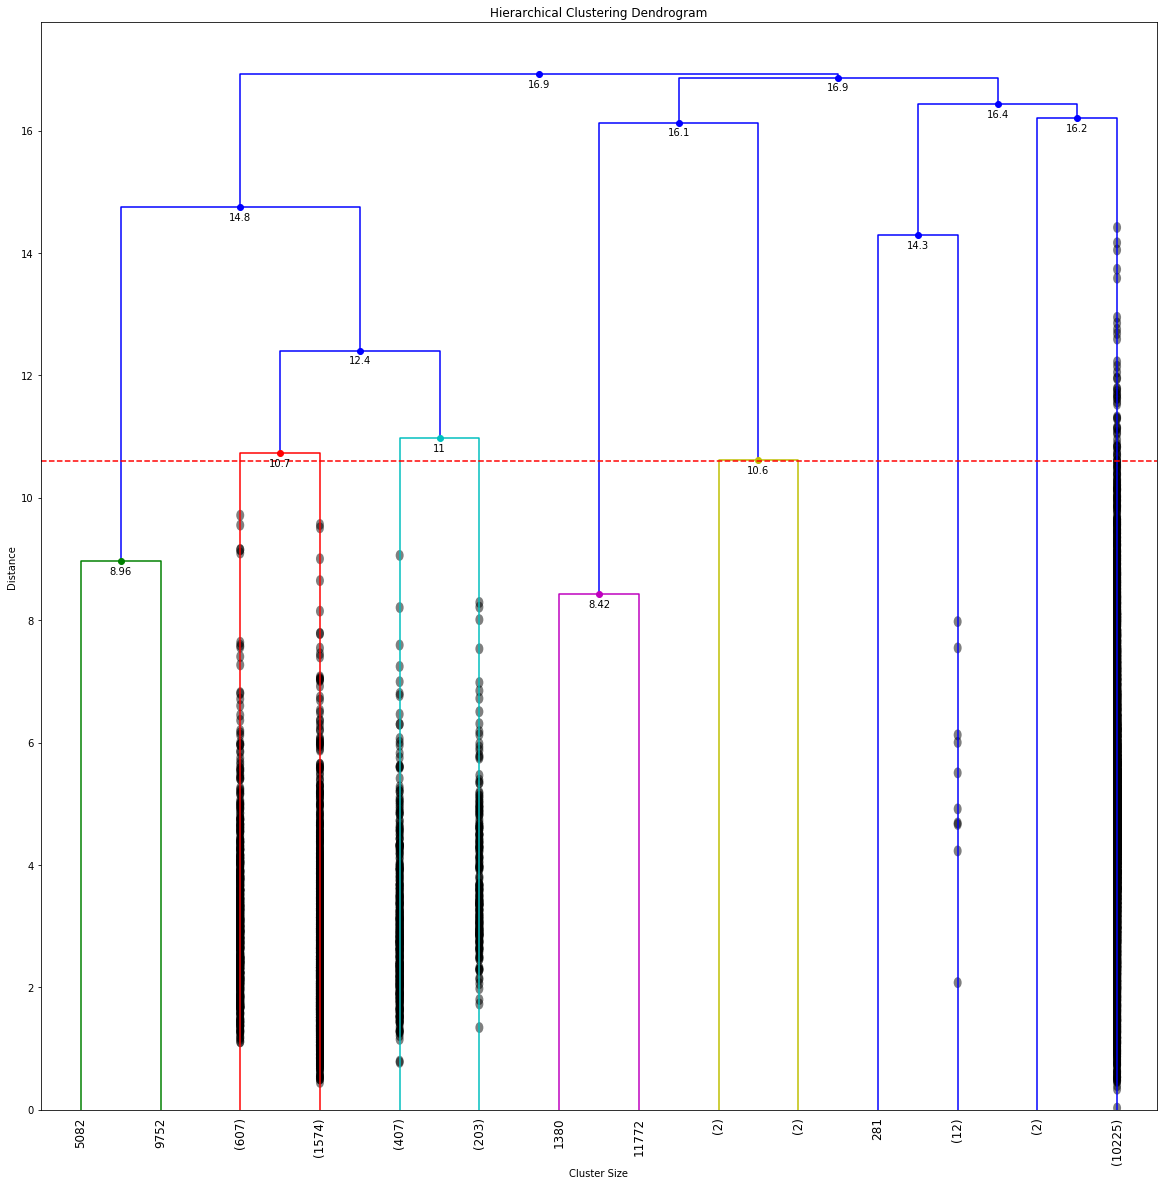

In [0]:
plt.figure(figsize=(20,20))
plt_dendrogram(
    average_linkage,
    truncate_mode='level',
    p=3, # increase to print more levels
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=2,  
)

plt.axhline(y=10.6, color='r', linestyle='--')
plt.show()

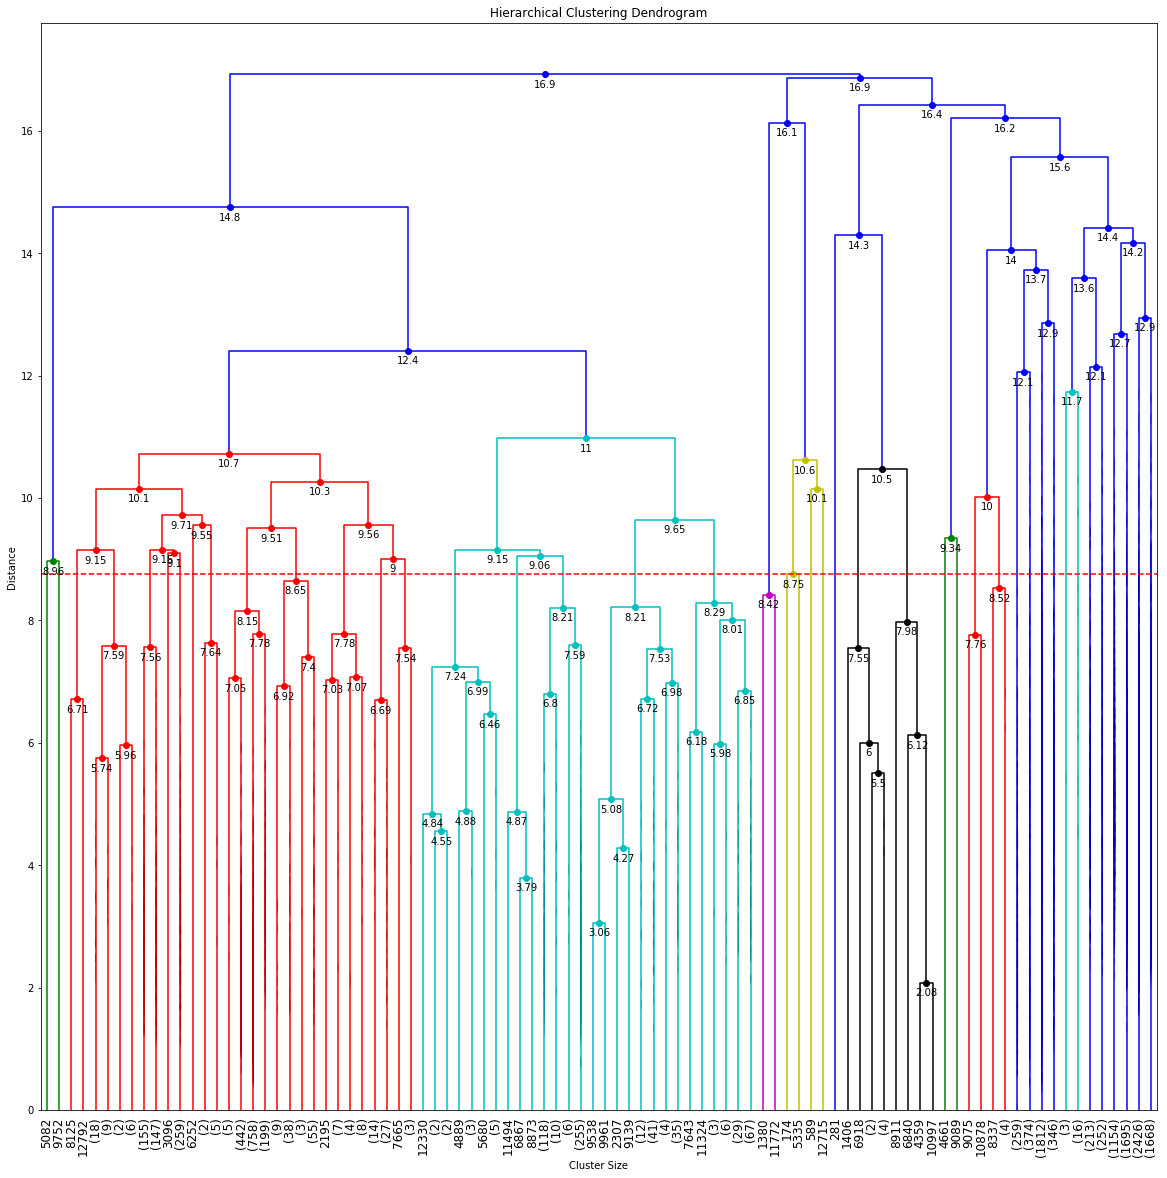

In [0]:
plt.figure(figsize=(20,20))
plt_dendrogram(
    average_linkage,
    truncate_mode='level',
    p=7, # increase to print more levels
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=2,  
)

plt.axhline(y=8.75, color='r', linestyle='--')
plt.show()

### Hierarchical Agglomerative Clustering 

#### Clustering with 11 clusters

In [0]:
cluster_11 = AgglomerativeClustering(n_clusters=11, affinity='precomputed', linkage='average')
clustering = cluster_11.fit(D_3_square)


Count the number of datapoints in each cluster

In [0]:
collections.Counter(clustering.labels_)

Counter({2: 4094,
         0: 2798,
         3: 2791,
         4: 2849,
         1: 484,
         6: 4,
         9: 1,
         8: 12,
         5: 2,
         10: 2,
         7: 2})

Make dataframe 'info_11' of each data entry ID, tq_v3, target variables, cluster label

In [0]:
clustering_labels_11 = pd.DataFrame(clustering.labels_, columns=['cluster_11'])

In [0]:
# using df_all_2 because this is the unscaled data
datainfo = pd.DataFrame(df_all_2[['id', 'tq_v3','tq_dt1_mean','tq_dt2_mean','tq_dt3_mean','tq_dt4_mean','tq_dt1_std','tq_dt2_std','tq_dt3_std','tq_dt4_std']])

In [0]:
clustering_labels_11.reset_index(drop=True, inplace=True)
datainfo.reset_index(drop=True, inplace=True)

In [0]:
info_11 = pd.concat([datainfo,clustering_labels_11], axis = 1)

In [0]:
info_11.head()

,id,tq_v3,tq_dt1_mean,tq_dt2_mean,tq_dt3_mean,tq_dt4_mean,tq_dt1_std,tq_dt2_std,tq_dt3_std,tq_dt4_std,cluster_11
0,12468,16,0.0984,0.0328,0.0,0.0164,0.3514,0.1796,0.0,0.128,2
1,32442,4,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.000,2
2,26216,3,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.000,2
3,50550,1,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.000,0
4,45726,2,0.1250,0.0000,0.0,0.0000,0.3536,0.0000,0.0,0.000,2


To get summary statistics of the target variables for each cluster

In [0]:
# Summary statistics of target varaibles for cluster 0
info_11[info_11.cluster_11 == 0].describe()

,id,tq_v3,tq_dt1_mean,tq_dt2_mean,tq_dt3_mean,tq_dt4_mean,tq_dt1_std,tq_dt2_std,tq_dt3_std,tq_dt4_std,cluster_11
count,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.0
mean,32379.490350,4.946390,0.072890,0.048472,0.003964,0.006998,0.199792,0.148439,0.022268,0.030713,0.0
std,18828.648296,14.423518,0.197219,0.169019,0.047171,0.062031,0.195790,0.167710,0.057401,0.063321,0.0
min,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,16394.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,32514.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.277400,0.178000,0.000000,0.000000,0.0
75%,48088.250000,3.000000,0.066700,0.023450,0.000000,0.000000,0.287727,0.226921,0.050070,0.060892,0.0
max,65314.000000,333.000000,3.000000,4.000000,1.000000,1.000000,1.732100,1.414200,1.414200,0.816500,0.0


Plotting the target variable values for each cluster on box plots (one plot for each of the 8 target varaibles) to assess the distribution of the target variables in each cluster.

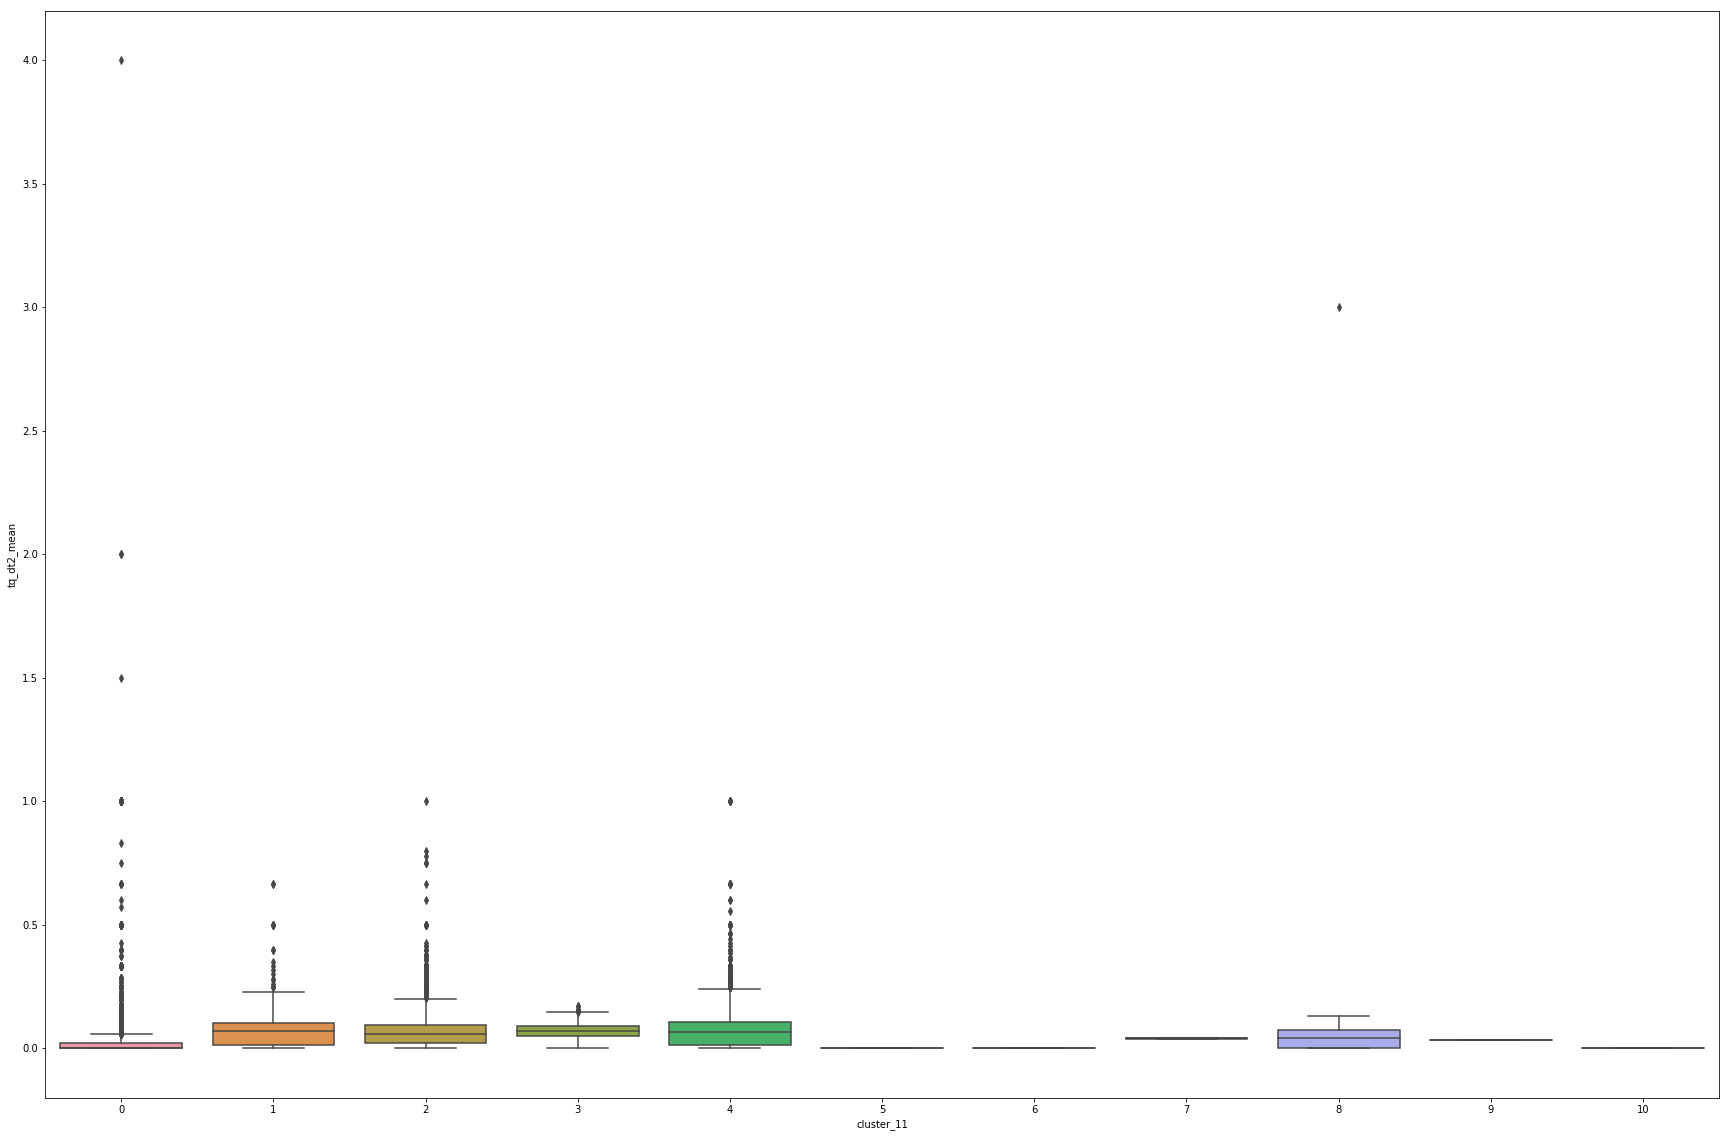

In [0]:
plt.figure(figsize=(30,20))
seaborn.boxplot(x='cluster_11', y= 'tq_dt2_mean', data = info_11)

To list which data entries (by id) belong to cluster 

In [0]:
# Data entries belonging to cluster 0
cluster0 = info_11[info_11.cluster_11 == 0] 
print(cluster0.shape)
print(cluster0.id)

(2798, 11)
3        50550
5        52654
9        39706
10        8406
26       19234
28        6978
43       48162
44       58619
65       31951
68       61711
75        5392
77       40663
81       34001
84        2360
87        4228
90       44587
103      31054
114      16559
120       1821
123      47005
124       2877
130      41719
131      14169
132      38430
135      39070
146       3702
147      42043
152      28260
154      17680
160      25754
         ...  
12872    37830
12873    42475
12874    62711
12879    44358
12882    49897
12896     7546
12908    59604
12910    19280
12920     6259
12923    48790
12940    12526
12942    17504
12948    34357
12949    15893
12953    45227
12960    16497
12963     1360
12976    29004
12982    47393
12990    13408
12991    54311
12997    12861
12999    10883
13002    34773
13008    42047
13019    48711
13021    13797
13022    19166
13031    25080
13034     9088
Name: id, Length: 2798, dtype: int64


Investigating tq_v3 variable

Unscaled mean value of 'tq_v3' per cluster

In [0]:
tq_v3 =info_11.groupby('cluster_11')['tq_v3'].mean()
tq_v3.sort_values()

cluster_11
5       1.500000
6       1.750000
10      2.500000
8       4.333333
0       4.946390
9      22.000000
4      23.972271
1      32.103306
2      33.872252
7      34.500000
3     619.588678
Name: tq_v3, dtype: float64

### t-SNE visualization 

Plot the clusters with t-SNE to visualise the clusters

In [0]:
D_square_TSNE_11 = TSNE(n_components=2, metric = 'precomputed', random_state = 123).fit_transform(D_3_square) #use two componenets, so can be plotted in 2D

# Select the 0th feature: xs
x = D_square_TSNE_11[:,0]
# Select the 1st feature: ys
y = D_square_TSNE_11[:,1]

Visualising the dataset

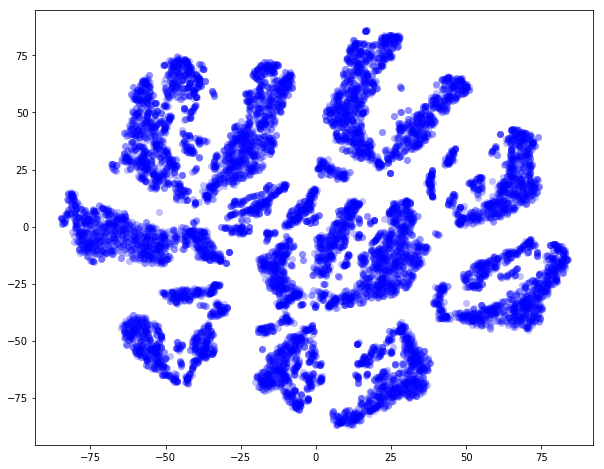

In [0]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=50, linewidth=0, c='b', alpha=0.25)

Visualise the clusters

In [0]:
D_square_TSNE_11 =  pd.DataFrame(D_square_TSNE_11, columns=['D_square_TSNE_11_x','D_square_TSNE_11_y'])

In [0]:
D_square_TSNE_11 = pd.concat([D_square_TSNE_11,clustering_labels_11], axis = 1)

In [0]:
D_square_TSNE_11.head()

,D_square_TSNE_11_x,D_square_TSNE_11_y,cluster_11
0,-21.228294,32.767761,2
1,3.023602,-11.961539,2
2,3.882936,29.398232,2
3,-11.283945,-29.191425,0
4,4.687564,-17.569279,2


In [0]:
%matplotlib inline 

#set font size of labels on matplotlib plots
plt.rc('font', size=20)

# set colour pallet
customPalette = sns.set_palette("Paired",11)

Visualise the clusters on t-SNE plot (colour coded by cluster)

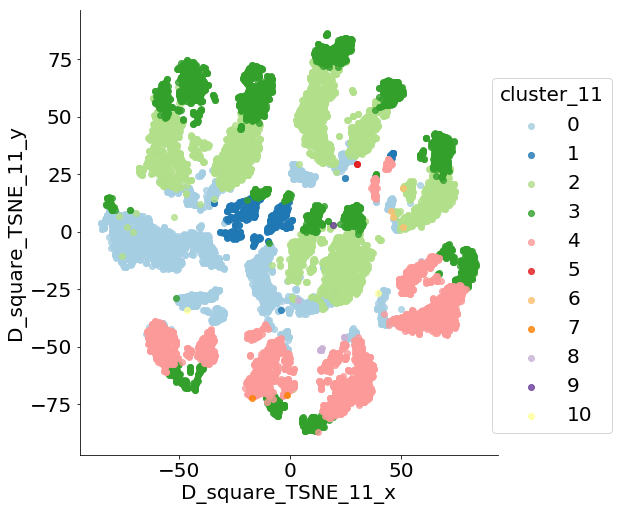

In [0]:
sns.lmplot(data=D_square_TSNE_11, x='D_square_TSNE_11_x', y='D_square_TSNE_11_y', hue='cluster_11', size =7.5, fit_reg=False, legend=True, legend_out=True
          )  

#### Clustering with 42 clusters

In [0]:
cluster_42 = AgglomerativeClustering(n_clusters=42, affinity='precomputed', linkage='average')
clustering = cluster_42.fit(D_3_square)


Count the number of datapoints in each cluster

In [0]:
collections.Counter(clustering.labels_)

Counter({38: 1272,
         11: 1061,
         18: 1110,
         26: 362,
         2: 1355,
         4: 2181,
         41: 849,
         9: 749,
         12: 604,
         0: 610,
         16: 546,
         36: 582,
         1: 213,
         10: 43,
         24: 97,
         7: 16,
         6: 313,
         19: 76,
         34: 158,
         25: 7,
         15: 170,
         8: 94,
         13: 4,
         22: 259,
         29: 174,
         39: 1,
         37: 1,
         20: 38,
         5: 25,
         14: 20,
         17: 12,
         23: 2,
         35: 3,
         3: 5,
         32: 9,
         40: 4,
         30: 2,
         28: 3,
         21: 2,
         31: 2,
         27: 3,
         33: 2})

Make dataframe 'info_42' of each data entry ID, tq_v3, target variables, cluster label

In [0]:
clustering_labels_42 = pd.DataFrame(clustering.labels_, columns=['cluster_42'])

In [0]:
# using df_all_2 because this is the unscaled data
datainfo = pd.DataFrame(df_all_2[['id', 'tq_v3','tq_dt1_mean','tq_dt2_mean','tq_dt3_mean','tq_dt4_mean','tq_dt1_std','tq_dt2_std','tq_dt3_std','tq_dt4_std']])

In [0]:
clustering_labels_42.reset_index(drop=True, inplace=True)
datainfo.reset_index(drop=True, inplace=True)

In [0]:
info_42 = pd.concat([datainfo,clustering_labels_42], axis = 1)

In [0]:
info_42.head()

,id,tq_v3,tq_dt1_mean,tq_dt2_mean,tq_dt3_mean,tq_dt4_mean,tq_dt1_std,tq_dt2_std,tq_dt3_std,tq_dt4_std,cluster_42
0,12468,16,0.0984,0.0328,0.0,0.0164,0.3514,0.1796,0.0,0.128,38
1,32442,4,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.000,11
2,26216,3,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.000,18
3,50550,1,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.000,26
4,45726,2,0.1250,0.0000,0.0,0.0000,0.3536,0.0000,0.0,0.000,11


To get summary statistics of the target variables for each cluster

In [0]:
# Summary statistics of target varaibles for cluster 0
info_42[info_42.cluster_42 == 0].describe()

,id,tq_v3,tq_dt1_mean,tq_dt2_mean,tq_dt3_mean,tq_dt4_mean,tq_dt1_std,tq_dt2_std,tq_dt3_std,tq_dt4_std,cluster_42
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.0
mean,32455.237705,336.580328,0.123352,0.081739,0.009157,0.012117,0.364362,0.302845,0.095933,0.106989,0.0
std,18490.049616,410.385310,0.030816,0.025656,0.006637,0.007004,0.048748,0.055638,0.044958,0.037212,0.0
min,27.000000,32.000000,0.042600,0.015700,0.000000,0.000000,0.202600,0.124700,0.000000,0.000000,0.0
25%,17457.250000,124.000000,0.100375,0.063900,0.004425,0.007200,0.333700,0.267250,0.068825,0.086250,0.0
50%,31808.500000,205.500000,0.124050,0.080700,0.007800,0.011250,0.366900,0.306250,0.095350,0.108200,0.0
75%,47929.750000,363.000000,0.146450,0.098900,0.012500,0.015975,0.398325,0.338025,0.125075,0.128600,0.0
max,65267.000000,3837.000000,0.221300,0.171900,0.059500,0.053000,0.589900,0.575800,0.311400,0.293000,0.0


Plotting the target varaible values for each cluster on box plots (one plot for each of the 8 target varaibles) to assess the distribution of the target variables in each cluster.

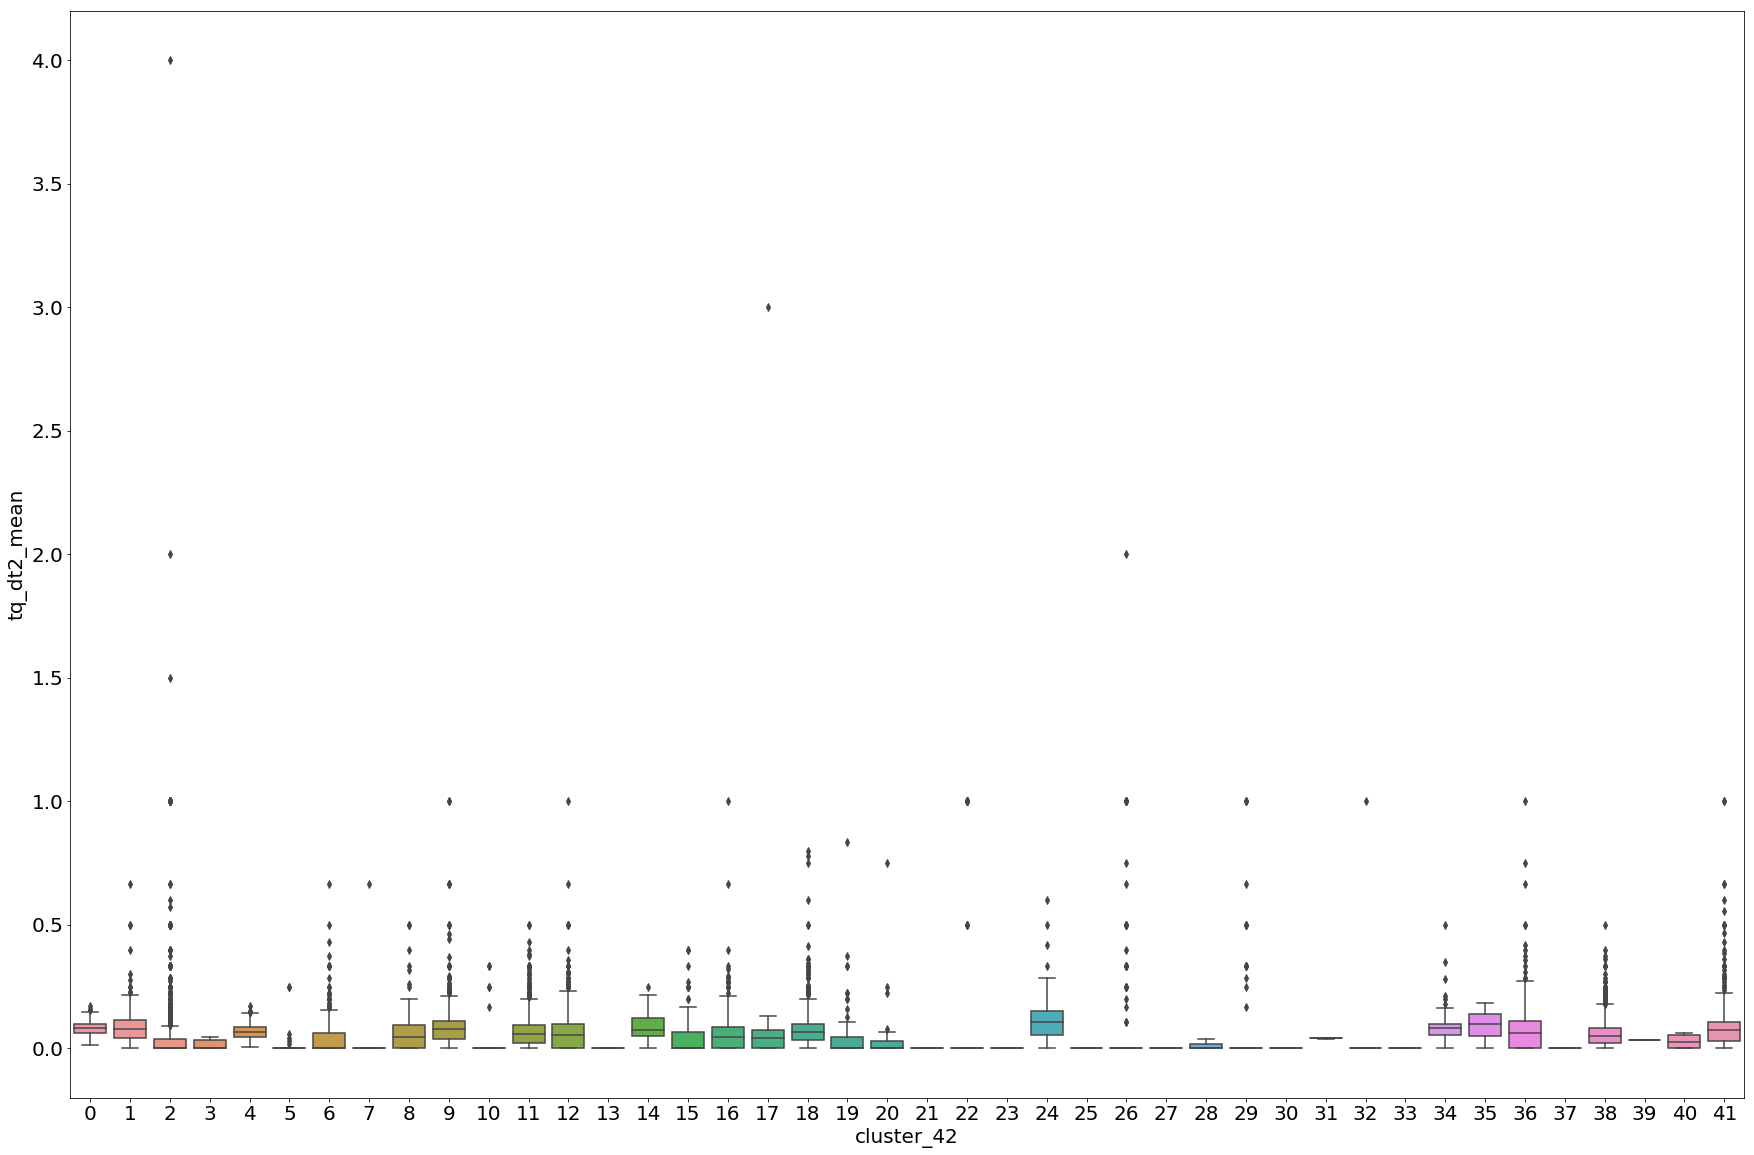

In [0]:
plt.figure(figsize=(30,20))
seaborn.boxplot(x='cluster_42', y= 'tq_dt2_mean', data = info_42)

To list which data entries (by id) belong to each cluster


In [0]:
# Data entries belonging to cluster 0
cluster0 = info_42[info_42.cluster_42 == 0] 
print(cluster0.shape)
print(cluster0.id)

(610, 11)
22       40835
42        7104
57        5763
63       18095
125      17524
158      27503
181      46914
222      42708
228      39635
237       6528
242      28712
285       8666
300      29694
301      61406
336      15129
354      11118
364       9029
367       8545
368      10917
387       4510
452      55478
475       6475
481      16783
499      62783
527      29216
548       5233
551      58617
614      44324
663       8692
718       4710
         ...  
12409    63269
12431     8927
12464    14926
12472    48175
12478      422
12521    57280
12534    26452
12536    30723
12605    57461
12616    21031
12630    64599
12675    50106
12678    49979
12711    36362
12713    25886
12732    59155
12747    26275
12776    59643
12783    63210
12801    18406
12810    41532
12814    28959
12816    14210
12823    28816
12856    28403
12878    12328
12939    38356
12967    39025
12972    11226
13024    45100
Name: id, Length: 610, dtype: int64


Investigating tq_v3 variable

Unscaled mean value of 'tq_v3' per cluster

In [0]:
tq_v3 =info_42.groupby('cluster_42')['tq_v3'].mean()
tq_v3.sort_values()

cluster_42
22      0.166023
26      0.527624
29      0.574713
32      1.000000
30      1.000000
37      1.000000
27      1.000000
7       1.000000
10      1.186047
23      1.500000
33      1.500000
13      1.750000
35      2.333333
21      2.500000
17      4.333333
2       4.735055
20      5.131579
5       5.680000
19      6.750000
40      7.500000
15      7.770588
8       8.148936
3       9.000000
25     12.857143
28     13.333333
16     14.170330
12     15.372517
6      15.840256
36     20.549828
39     22.000000
24     22.195876
11     29.285580
14     29.500000
41     30.393404
9      31.092123
1      32.070423
31     34.500000
38     35.047956
18     45.209910
34     50.139241
0     336.580328
4     698.742779
Name: tq_v3, dtype: float64

### t-SNE visualization 

Plot the clusters with t-SNE to visualise the clusters

In [0]:
D_square_TSNE_42 = TSNE(n_components=2, metric = 'precomputed', random_state = 123).fit_transform(D_3_square) #use two componenets, so can be plotted in 2D

# Select the 0th feature: xs
x = D_square_TSNE_42[:,0]
# Select the 1st feature: ys
y = D_square_TSNE_42[:,1]

In [0]:
D_square_TSNE_42 =  pd.DataFrame(D_square_TSNE_42, columns=['D_square_TSNE_42_x','D_square_TSNE_42_y'])

In [0]:
D_square_TSNE_42 = pd.concat([D_square_TSNE_42,clustering_labels_42], axis = 1)

In [0]:
D_square_TSNE_42.head()

,D_square_TSNE_42_x,D_square_TSNE_42_y,cluster_42
0,-21.228294,32.767761,38
1,3.023602,-11.961539,11
2,3.882936,29.398232,18
3,-11.283945,-29.191425,26
4,4.687564,-17.569279,11


In [0]:
%matplotlib inline 

#set font size of labels on matplotlib plots
plt.rc('font', size=10)

# set colour pallet
customPalette = sns.set_palette("Paired",42)

Visualise the clusters on t-SNE plot (colour coded by cluster)

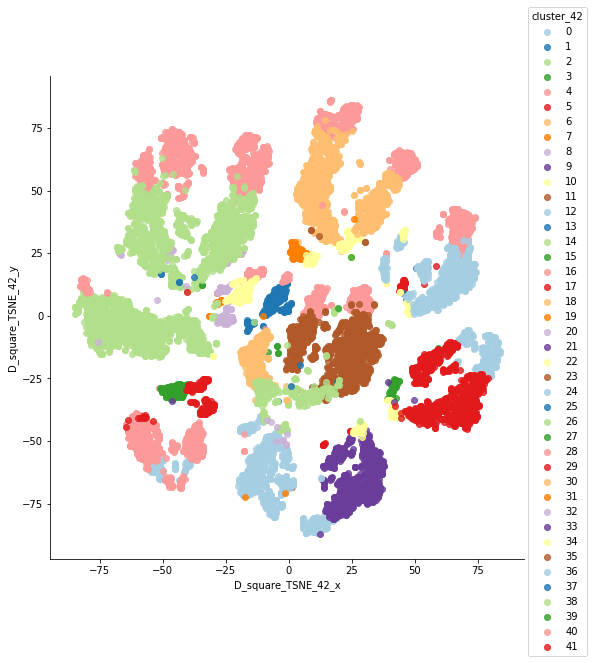

In [0]:
sns.lmplot(data=D_square_TSNE_42, x='D_square_TSNE_42_x', y='D_square_TSNE_42_y', hue='cluster_42', size =7.5, fit_reg=False, legend=True, legend_out=True
          )  